In [ ]:
from Functions import*

# connect to the LCR meter
ser = DeviceConnect('COM10')

try:
    params = input('Input material i.e. P8 PVC or Mineral Oil')
    params = f'{params} Capacitance and Dissipation Factor'

    """DEF cell is 12.75 mm diameter and 1.11 mm thick"""
    area = np.pi/4*12.75**2     # float(input('Input the gel area in mm i.e. 10.2'))**2
    thickness = 1.11            # input('Input the gel thickness in mm i.e. 1')


    # ser - serial connection
    # frequencies - frequency limits between [20, 300e5] (Hz)
    # numbeerOfPoints - the number of evenly spaced frequency points
    # measurement - choose a measurement below. input the number
    #   CSQ/0  | CSD/1  | CSR/2  | CPQ/3  | CPD/4  | CPR/5 |
    #   CPG/6  | LSQ/7  | LSD/8  | LSR/9  | LPQ/10 | LPD/11|
    #   LPR/12 | LPG/13 | ZTH/14 | YTH/15 | RX/16  | GB/17 |
    # voltage - the voltage applied between electrodes either 0.5 or 1 (V)
    
    Data = Experiment(ser, frequencies = [20, 300e3], numberOfpoints = 50, measurement = 4, voltage = 1)
    DeviceDisconnect(ser)
    DataExport(params, Data, f'{area}, {thickness}, {1} - Area, thickness, voltage')

except: 
    print('Test Aborted')
    DeviceDisconnect(ser)


Frequencies: [    20     23     27     32     38     45     53     62     73     86
    102    120    141    166    195    230    271    319    375    442
    520    612    721    849    999   1176   1384   1629   1918   2257
   2657   3127   3681   4333   5100   6003   7065   8316   9788  11521
  13560  15960  18786  22111  26025  30632  36055  42437  49949  58790
  69197  81446  95863 112832 132805 156313 183982 216550 254882 300000]


Frequency: 20
[2.00000e+01 1.87440e-09 8.91205e+01]

Frequency: 23
[2.30000e+01 1.90300e-09 8.79775e+01]

Frequency: 27
[2.7000e+01 1.9924e-09 8.7717e+01]

Frequency: 32
[3.20000e+01 2.09885e-09 8.77570e+01]

Frequency: 38
[3.80000e+01 2.22505e-09 8.36765e+01]

Frequency: 45
[4.50000e+01 2.27425e-09 7.91485e+01]

Frequency: 53
[ 5.30000e+01  2.31745e-09 -4.35560e+01]

Frequency: 62
[ 6.20000e+01  2.55090e-09 -7.35765e+01]

Frequency: 73
[ 7.30000e+01  2.84075e-09 -7.79245e+01]

Frequency: 86
[ 8.6000e+01  3.1774e-09 -7.9895e+01]

Frequency: 102
[ 1.020

C:\Users\facci\AppData\Local\Temp\ipykernel_22668\2220118228.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[0].set_yscale('log')
C:\Users\facci\AppData\Local\Temp\ipykernel_22668\2220118228.py:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].set_yscale('log')


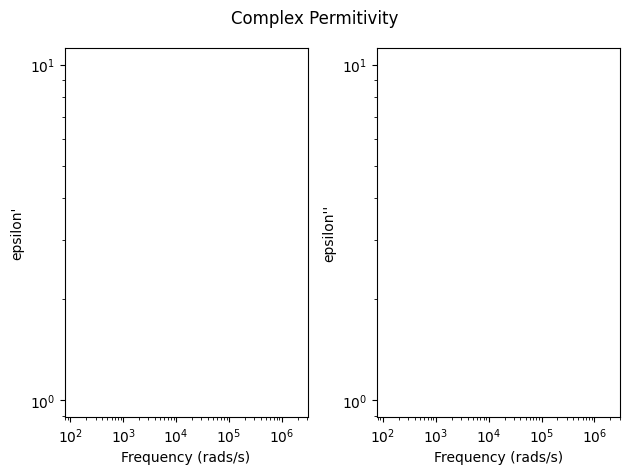

C:\Users\facci\AppData\Local\Temp\ipykernel_22668\2220118228.py:47: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].set_yscale('log')


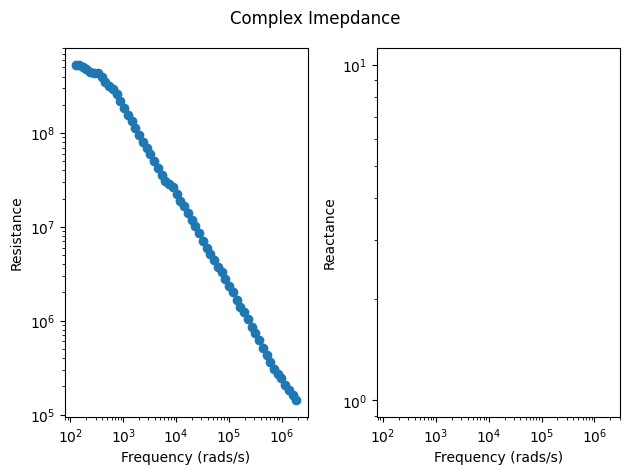

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# load the area, thickness, and voltage from the first line
params = np.loadtxt('Data/Test Capacitance and Dissipation Factor.csv', delimiter = ',', dtype = str, max_rows = 1)
area, thickness, voltage = [float(params[0]), float(params[1]), float(params[2].split('-')[0])]

# load the data and define the appropiate variables
data = np.loadtxt('Data/Test Capacitance and Dissipation Factor.csv', delimiter = ',', skiprows = 3,  dtype = float)
freq = 2*np.pi*data[:,0]
Cp = data[:,1]
D = data[:,2]

# determine complex admittance and impedance
Admittance = data[:,1]# freq*Cp*(D + 1j)
Impedance = 1/Admittance

# determine perimittivity
C0 = area/thickness*8.85e-15 # area (mm^2), thickness (mm), vacuum permitivity (F/mm)
permitivity = Admittance/(freq*C0*1j)

fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, permitivity.real)
axs[1].scatter(freq, permitivity.imag, c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('epsilon\'')
axs[1].set_ylabel('epsilon\'\'')
fig.suptitle('Complex Permitivity')
plt.tight_layout()
plt.show()  


fig, axs = plt.subplots(1, 2)
axs[0].scatter(freq, Impedance.real)
axs[1].scatter(freq, Impedance.imag, c = 'tab:orange')

axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlabel('Frequency (rads/s)')
axs[1].set_xlabel('Frequency (rads/s)')
axs[0].set_ylabel('Resistance')
axs[1].set_ylabel('Reactance')
fig.suptitle('Complex Imepdance')
plt.tight_layout()
plt.show()  # Display plot